In [12]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("athletes.csv")
data.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|


DVC tool:

In [3]:
#1
v1 = data.copy()

In [4]:
#2
#Drop rows with NA in key columns (train removed!)
v2 = v1.dropna(subset=[
    'region', 'age', 'weight', 'height', 'howlong', 'gender', 'eat',
    'background', 'experience', 'schedule',
    'deadlift', 'candj', 'snatch', 'backsq'
])

#Drop irrelevant columns
v2 = v2.drop(columns=[
    'affiliate','team','name','athlete_id','fran','helen','grace',
    'filthy50','fgonebad','run400','run5k','pullups','train'  # safe to drop here
])


In [5]:
#Remove outliers
v2 = v2[v2['weight'] < 1500]
v2 = v2[v2['gender'] != '--']
v2 = v2[v2['age'] >= 18]
v2 = v2[(v2['height'] < 96) & (v2['height'] > 48)]

#Deadlift outliers: Different thresholds for male/female
v2 = v2[
    ((v2['deadlift'] > 0) & (v2['deadlift'] <= 1105)) |
    ((v2['gender'] == 'Female') & (v2['deadlift'] <= 636))
]

# Other lifts outliers
v2 = v2[(v2['candj'] > 0) & (v2['candj'] <= 395)]
v2 = v2[(v2['snatch'] > 0) & (v2['snatch'] <= 496)]
v2 = v2[(v2['backsq'] > 0) & (v2['backsq'] <= 1069)]

In [8]:
v2 = v2.replace({'Decline to answer|': np.nan})
v2 = v2.dropna(subset=['background','experience','schedule','howlong','eat'])

v2.head()

,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,background,experience,schedule,howlong
21,Southern California,Male,30.0,71.0,200.0,235.0,175.0,385.0,315.0,I eat whatever is convenient|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|
22,Africa,Male,28.0,70.0,176.0,187.0,134.0,335.0,254.0,I eat 1-3 full cheat meals per week|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|
27,North East,Male,35.0,68.0,225.0,285.0,205.0,440.0,405.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,2-4 years|
50,North Central,Male,36.0,71.0,199.0,267.0,212.0,485.0,390.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,1-2 years|
60,North East,Male,36.0,64.0,155.0,245.0,180.0,415.0,385.0,I eat strict Paleo|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 2x a week|I st...,4+ years|


In [47]:
v1.to_csv("v1.csv", index=False)
v2.to_csv("v2.csv", index=False)

In [9]:
#3
# v1 (raw dataset)
v1["total_lift"] = v1[["deadlift", "candj", "snatch", "backsq"]].sum(axis=1)

# v2 (cleaned dataset)
v2["total_lift"] = v2[["deadlift", "candj", "snatch", "backsq"]].sum(axis=1)

# Split into train/test sets with the same ratio (e.g., 80/20)
from sklearn.model_selection import train_test_split

# v1 split
v1_train, v1_test = train_test_split(v1, test_size=0.2, random_state=42)

# v2 split
v2_train, v2_test = train_test_split(v2, test_size=0.2, random_state=42)

In [10]:
v1_train.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,total_lift
205192,37133.0,Robin Johnson,North West,CrossFit Wenatchee,CrossFit Wenatchee,Female,45.0,65.0,NaN,NaN,...,235.0,155.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,2-4 years|,575.0
95699,101981.0,Brad Hillard,Central East,NaN,Lake State CrossFit,Male,33.0,69.0,214.0,157.0,...,425.0,435.0,36.0,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I do multipl...,2-4 years|,1330.0
94593,493083.0,Mark Bredenbeck,Australia,CrossFit Dunedin,CrossFit Dunedin,Male,42.0,NaN,180.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
350944,134688.0,Holly Stave,NaN,NaN,NaN,Female,48.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
327230,252441.0,Victoria Buls,North West,Big Mountain CrossFit,Big Mountain CrossFit,Female,16.0,69.0,146.0,330.0,...,243.0,188.0,25.0,I weigh and measure my food|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a week|,1-2 years|,667.0


In [11]:
v2_train.head()

,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,background,experience,schedule,howlong,total_lift
121457,Canada East,Male,24.0,69.0,175.0,225.0,165.0,445.0,315.0,I eat whatever is convenient|,I regularly play recreational sports|,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 3+ times a wee...,1-2 years|,1150.0
166385,Australia,Female,29.0,62.0,127.0,110.0,88.0,236.0,187.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 2x a week|I ty...,1-2 years|,621.0
55391,North Central,Male,29.0,71.0,210.0,245.0,175.0,525.0,375.0,I eat whatever is convenient|,I played college sports|,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I typically ...,6-12 months|,1320.0
175696,Mid Atlantic,Female,30.0,64.0,135.0,160.0,115.0,240.0,195.0,I eat quality foods but don't measure the amou...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,710.0
81711,Latin America,Male,28.0,70.0,170.0,243.0,198.0,430.0,320.0,I eat quality foods but don't measure the amount|,I have no athletic background besides CrossFit|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I do multipl...,Less than 6 months|,1191.0


In [58]:
#4
!dvc checkout data/v1.csv.dvc
df = pd.read_csv("data/v1.csv")

ERROR: you are not inside of a DVC repository (checked up to mount point '/')


In [56]:
!pip install dvc


  Using cached dvc-3.60.1-py3-none-any.whl.metadata (17 kB)
  Using cached celery-5.5.3-py3-none-any.whl.metadata (22 kB)
  Using cached configobj-5.0.9-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached dpath-2.2.0-py3-none-any.whl.metadata (15 kB)
  Using cached dvc_data-3.16.10-py3-none-any.whl.metadata (5.0 kB)
  Using cached dvc_http-2.32.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached dvc_objects-5.1.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached dvc_render-1.0.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached dvc_studio_client-0.21.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached dvc_task-0.40.2-py3-none-any.whl.metadata (10.0 kB)
  Using cached flatten_dict-0.4.2-py2.py3-none-any.whl.metadata (9.2 kB)
  Using cached flufl_lock-8.2.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
  Using cached grandalf-0.8-py3-none-any.whl.metadata (1.7 kB)
  Using cached gto-1.7.2-py3-none-any.whl.metadata (4.7 kB)
  Using ca

In [57]:
!dvc --version


3.60.1


In [59]:
pd.read_csv("data/v1.csv")


,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,total_lift
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,925.0
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,0.0
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,1145.0
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423001,574489.0,Odo Renata,Latin America,Team Guarujá Inox,CrossFit Guaruja,Female,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
423002,585696.0,Lozzie Trevor,Australia,FBP CrossFit Games Team,FBP CrossFit,Female,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
423003,608828.0,Marisol Smith,North West,CrossFit Oak Harbor,CrossFit Oak Harbor,Female,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
423004,628881.0,Pedrini Morgane,Europe,NaN,CrossFit 67,Female,20.0,64.0,61.0,NaN,...,80.0,143.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,NaN,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I strictly s...,6-12 months|,300.0


In [13]:
#5
print("Shape:", v1.shape)
print("\nColumns:\n", v1.columns)
print("\nMissing Values:\n", v1.isna().sum())
print("\nNumeric Columns Description:\n", v1.describe())
print("\nGender counts:\n", v1["gender"].value_counts(dropna=False))


Shape: (423006, 28)

Columns:
 Index(['athlete_id', 'name', 'region', 'team', 'affiliate', 'gender', 'age',
       'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad',
       'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups',
       'eat', 'train', 'background', 'experience', 'schedule', 'howlong',
       'total_lift'],
      dtype='object')

Missing Values:
 athlete_id         3
name           91896
region        171744
team          267846
affiliate     181090
gender         91896
age            91896
height        263137
weight        193116
fran          367580
helen         392727
grace         382261
filthy50      403647
fgonebad      393268
run400        400760
run5k         386909
candj         318571
snatch        325726
deadlift      307683
backsq        312489
pullups       372398
eat           329074
train         317175
background    324061
experience    318070
schedule      325131
howlong       313800
total_lift         0
dtype: int64


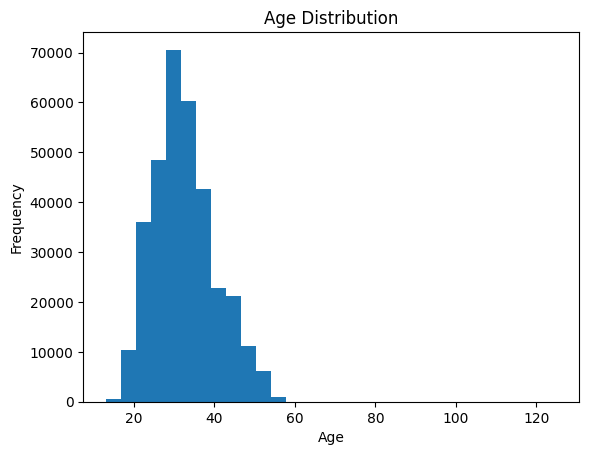

In [14]:
# === Age distribution ===
plt.hist(v1["age"].dropna(), bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


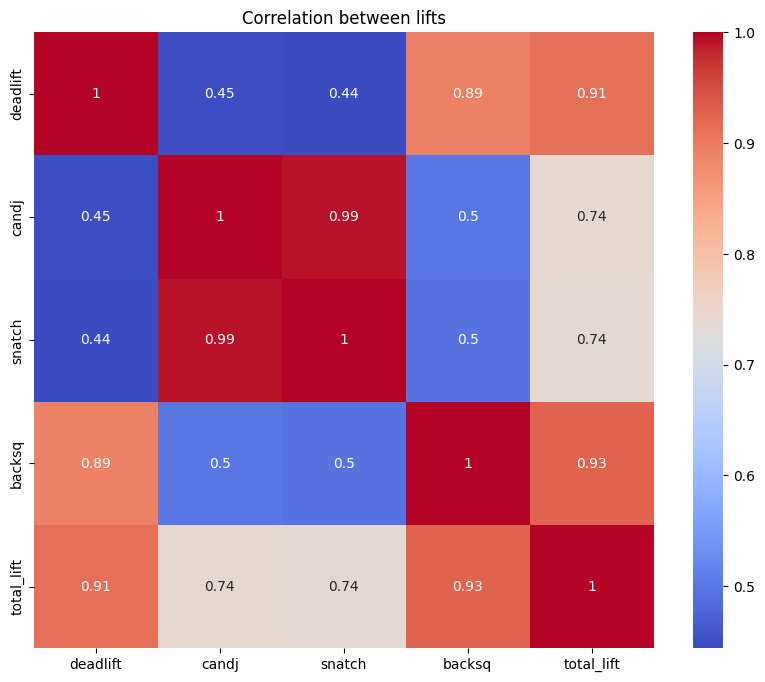

In [15]:
# === Correlation heatmap ===
plt.figure(figsize=(10,8))
sns.heatmap(v1[["deadlift","candj","snatch","backsq","total_lift"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between lifts")
plt.show()


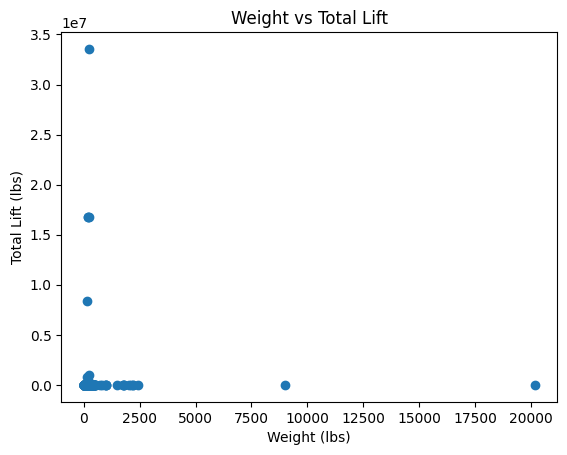

In [16]:
# === Scatter plot: weight vs total_lift ===
plt.scatter(v1["weight"], v1["total_lift"])
plt.xlabel("Weight (lbs)")
plt.ylabel("Total Lift (lbs)")
plt.title("Weight vs Total Lift")
plt.show()


In [36]:
#6&7
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import sys
from sklearn.metrics import mean_absolute_error

In [37]:
# Keep rows with all necessary numeric features
v1_model = v1.dropna(subset=["weight","height","age","deadlift","candj","snatch","backsq"])

# Features and target
X = v1_model[["weight","height","age"]]
y = v1_model["total_lift"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = LinearRegression()

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Linear Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Baseline Linear Regression Results:
Mean Squared Error: 19024988871.73
Mean Absolute Error: 2331.18
R2 Score: 0.00


In [51]:
#9&10
!dvc checkout data/v2.csv.dvc
df = pd.read_csv("data/v2.csv")

/bin/bash: dvc: command not found


In [38]:
print("Shape:", v2.shape)
print("\nColumns:\n", v2.columns)
print("\nMissing Values:\n", v2.isna().sum())
print("\nNumeric Columns Description:\n", v2.describe())
print("\nGender counts:\n", v2["gender"].value_counts(dropna=False))

Shape: (30161, 15)

Columns:
 Index(['region', 'gender', 'age', 'height', 'weight', 'candj', 'snatch',
       'deadlift', 'backsq', 'eat', 'background', 'experience', 'schedule',
       'howlong', 'total_lift'],
      dtype='object')

Missing Values:
 region        0
gender        0
age           0
height        0
weight        0
candj         0
snatch        0
deadlift      0
backsq        0
eat           0
background    0
experience    0
schedule      0
howlong       0
total_lift    0
dtype: int64

Numeric Columns Description:
                 age        height        weight         candj        snatch  \
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000   
mean      32.117204     68.873877    177.136799    205.467126    156.220981   
std        7.434075      3.773240     32.390506     58.709900     48.851811   
min       18.000000     52.000000      5.000000      1.000000      1.000000   
25%       27.000000     66.000000    155.000000    160.000000    120.

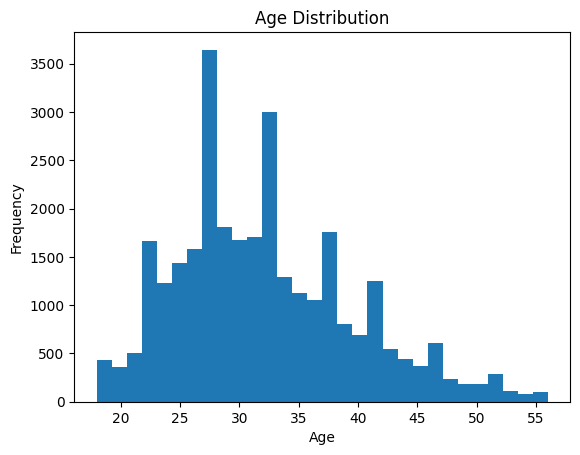

In [39]:
# === Age distribution ===
plt.hist(v2["age"].dropna(), bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


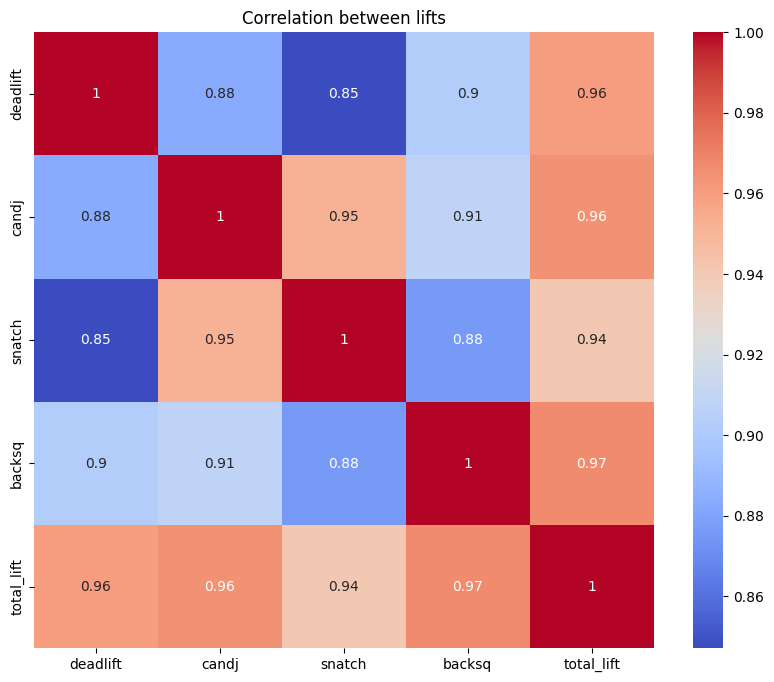

In [40]:
# === Correlation heatmap ===
plt.figure(figsize=(10,8))
sns.heatmap(v2[["deadlift","candj","snatch","backsq","total_lift"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between lifts")
plt.show()


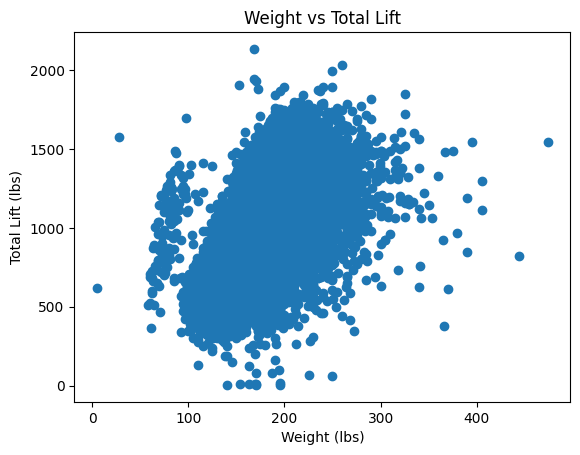

In [41]:
# === Scatter plot: weight vs total_lift ===
plt.scatter(v2["weight"], v2["total_lift"])
plt.xlabel("Weight (lbs)")
plt.ylabel("Total Lift (lbs)")
plt.title("Weight vs Total Lift")
plt.show()

In [42]:
# Keep rows with all necessary numeric features
v2_model = v2.dropna(subset=["weight","height","age","deadlift","candj","snatch","backsq"])

# Features and target
X = v2_model[["weight","height","age"]]
y = v2_model["total_lift"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = LinearRegression()

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Linear Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Baseline Linear Regression Results:
Mean Squared Error: 43381.50
Mean Absolute Error: 162.97
R2 Score: 0.44


#12:
Baseline Linear Regression Comparison:

v1 dataset:
  MSE: 19024988871.73
  MAE: 2331.18
  R²: 0.00

v2 dataset:
  MSE: 43381.50
  MAE: 162.97
  R²: 0.44

Observation:
  Comparing the v1 and v2 models shows that data cleaning greatly improved accuracy. The v1 model had an MSE over 19 billion and R² of 0.00, indicating no predictive power. In contrast, the v2 model reduced MSE to 43,381.50 and increased R² to 0.44. This suggests that cleaning and removing outliers made the data more suitable for regression, though further improvements are still needed.



lakeFS tool:

#4
Data Versioning with lakeFS:

- Uploaded raw dataset (v1) to lakeFS repository 'mlo-dataset'
- Created separate branches for v1 and v2
- Committed and merged versions to main
- Due to local Docker storage configuration, the direct HTTP API download caused 500 errors
- To proceed, I exported the versioned dataset via lakeFS UI and used the local file for model training
- And the rest of coding part is same as DVC tool 